In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importingg the dataset
df=pd.read_csv('Titanic-Train-Data.csv')

In [3]:
#shape
df.shape

(891, 12)

In [4]:
#previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#listing down the columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#categorical columns: Survived
                      Pclass
                      Sex
                      SibSp
                      Parch
                      Embarked
#numerical columns : Age
                     Fare
                     PassengerId
#Mixed columns:  Name
                 Ticket
                 Cabin
                     
                      
                      
                      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#few conclusions:
1.missin values in Age Cabin and Embarked columns
2.more than 70% values are missing in cabin column so we will have to drop
3.few columns have impropriate data types

In [8]:
df.drop(columns=['Cabin'],inplace=True)

In [9]:
#imputing missing values for Age
#strategy- mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
#imputing missing values for embarked
#finding the most frequently used value in Embarked column
df['Embarked'].value_counts()
#S it is
df['Embarked'].fillna('S',inplace=True)


In [11]:
#want to check one more thing
#should I change the SibSp and Parch to categories
df['SibSp'].value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#changingg data types for the following columns
#Survived(category)
#Pclass(category)
#Sex(category)
#Age(int)
#Embarked(category)


In [13]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [15]:
#five point summary
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


out of 891 62 people died in the accident


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


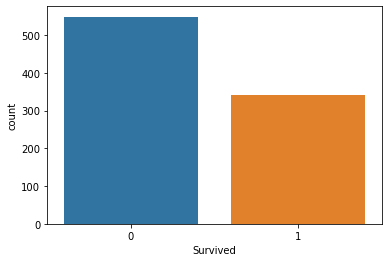

In [16]:
#univariate analysis
#let's start with the Survived column
sns.countplot(df['Survived'])
death_percent=round((df['Survived'].value_counts().values[0]/891*100))
print("out of 891 {} people died in the accident".format(death_percent))

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

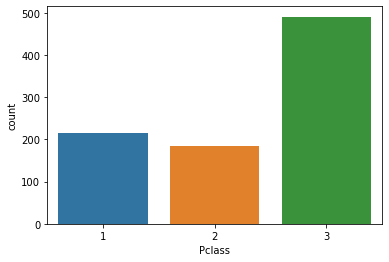

In [17]:
#Pclass column
print(df['Pclass'].value_counts()/891*100)
sns.countplot(df['Pclass'])


#Pclass  3 was the most crowded

male      64.758698
female    35.241302
Name: Sex, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

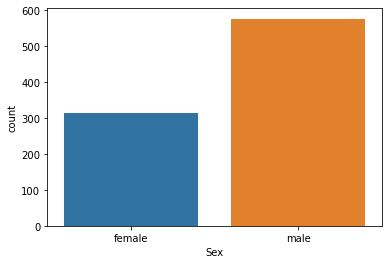

In [18]:
print((df['Sex'].value_counts()/891)*100)
sns.countplot(df['Sex'])

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

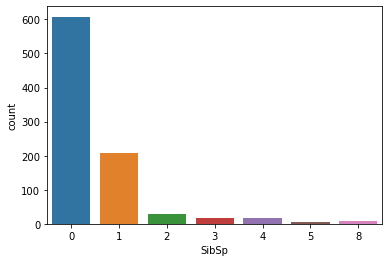

In [19]:
print(df['SibSp'].value_counts())
sns.countplot(df['SibSp'])

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

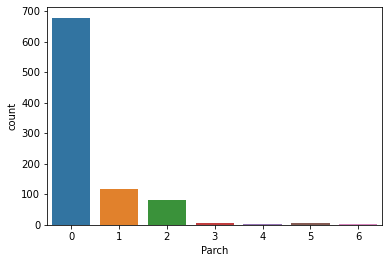

In [20]:
print((df['Parch'].value_counts()/891)*100)
sns.countplot(df['Parch'])

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

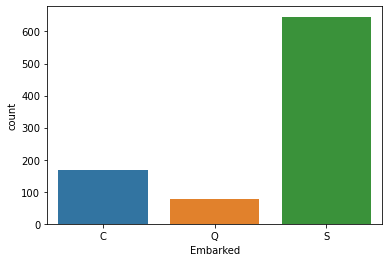

In [21]:
print((df['Embarked'].value_counts()/891)*100)
sns.countplot(df['Embarked'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


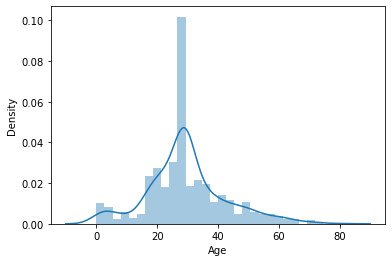

In [22]:
#Age column
sns.distplot(df['Age'])
print(df['Age'].skew())
print(df['Age'].kurt())

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

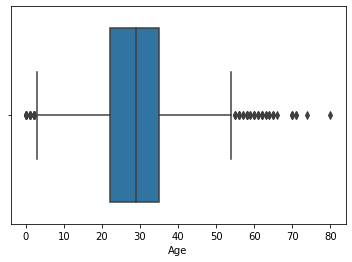

In [23]:
sns.boxplot(df['Age'])

In [24]:
#people in different age groups
print("People with age inbetween 60 and 70 years are",df[(df['Age']>60) & (df['Age']<70)].shape[0])
print("People with age in between 70and 75 years are",df[(df['Age']>=70) & (df['Age']<=75)].shape[0])
print("People whose age is greater than 7 years are",df[(df['Age']>75)].shape[0])

print('-'*50)
print("People within age group 0 and 1 are",df[df['Age']<1].shape[0])

People with age inbetween 60 and 70 years are 15
People with age in between 70and 75 years are 6
People whose age is greater than 7 years are 1
--------------------------------------------------
People within age group 0 and 1 are 7


conclusion: For all practical purposes Age can be considered as normal distribution
            Deeper analysis is required for outlier detection

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

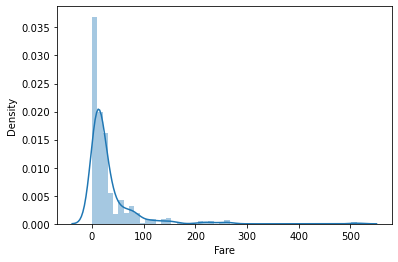

In [25]:
#Fare
sns.distplot(df['Fare'])

In [26]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

4.787316519674893
33.39814088089868


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

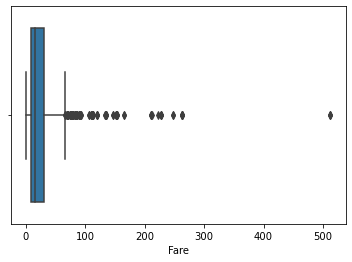

In [27]:
sns.boxplot(df['Fare'])

In [28]:
print("People with Fare in between $200 and $300 are",df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with Fare greater than $300 are",df[df['Fare']>300].shape[0])

People with Fare in between $200 and $300 are 17
People with Fare greater than $300 are 3


conclusions: (1)highly skewed data
            (2)Lot people have cheaper tickets
            (3)There are outliers in the data

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


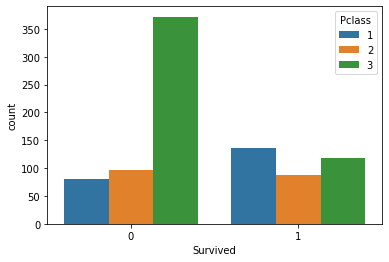

In [29]:
#Multivariate analysis
#Survival with Pclass
sns.countplot(df['Survived'],hue=df['Pclass'])
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


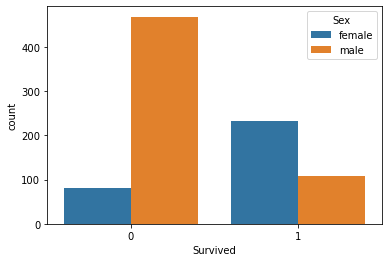

In [30]:
#survival with Sex
sns.countplot(df['Survived'],hue=df['Sex'])
pd.crosstab(df['Sex'],df['Survived']).apply(lambda r : round(r/r.sum()*100,1),axis=1)


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


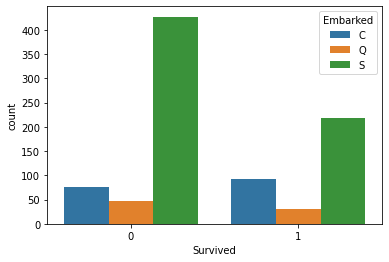

In [34]:
#survival with Embarked
sns.countplot(df['Survived'],hue=df['Embarked'])
pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1), axis=1)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

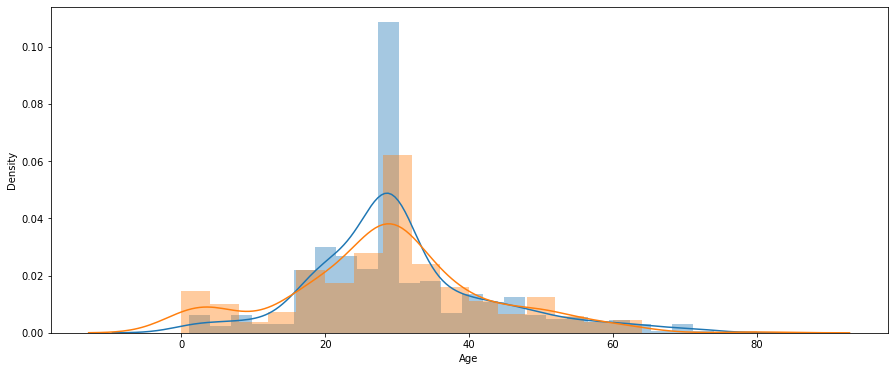

In [35]:
#survived with Age
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

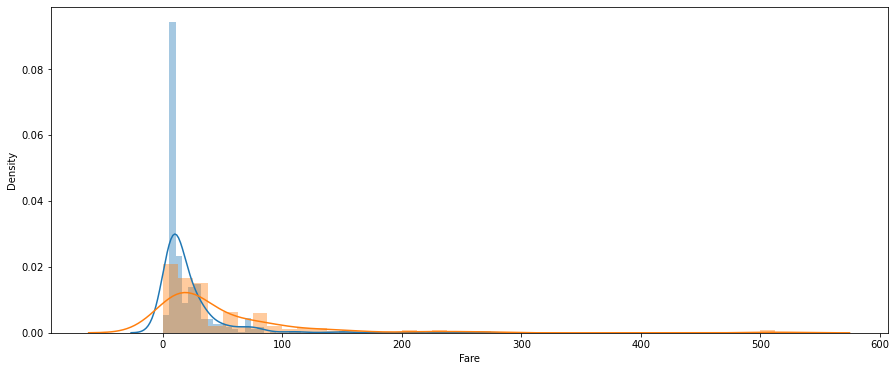

In [36]:
#Survived with Fare
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

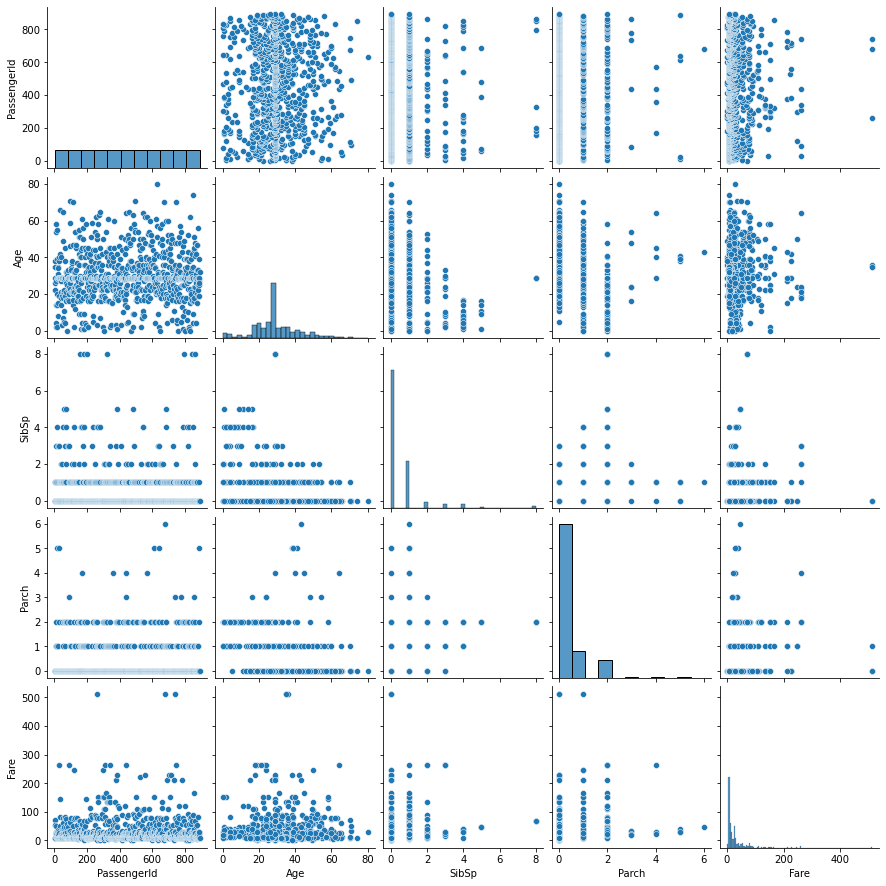

In [37]:
sns.pairplot(df)

<AxesSubplot:>

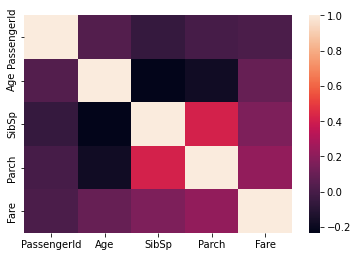

In [38]:
sns.heatmap(df.corr())

In [41]:
#Feature Engineering
# we will create a new column by the name of Family which will be the sum of SibSp and Parch cols
df['Family_size']=df['Parch']+df['SibSp']

In [42]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29,0,0,345777,9.5000,S,0
795,796,0,2,"Otter, Mr. Richard",male,39,0,0,28213,13.0000,S,0
644,645,1,3,"Baclini, Miss. Eugenie",female,0,2,1,2666,19.2583,C,3
269,270,1,1,"Bissette, Miss. Amelia",female,35,0,0,PC 17760,135.6333,S,0
812,813,0,2,"Slemen, Mr. Richard James",male,35,0,0,28206,10.5000,S,0


In [44]:
#now we will engineer a new feature by name Family type
def Family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 and number<=4:
        return 'Medium'
    else:
        return 'Large'


In [45]:
df['Family_type']=df['Family_size'].apply(Family_type)

In [46]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50,0,1,230433,26.0000,S,1,Medium
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45,0,0,111428,26.5500,S,0,Alone
318,319,1,1,"Wick, Miss. Mary Natalie",female,31,0,2,36928,164.8667,S,2,Medium
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26,1,0,2680,14.4542,C,1,Medium
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0000,S,0,Alone


In [49]:
pd.crosstab(df['Family_type'],df['Survived']).apply(lambda r : round((r/r.sum())*100,1),axis=1)

Survived,0,1
Family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


#Detecting outliers
(1)Numerical data:(i)If the data is following normal distribution, anything beyond 3SD-mean+3SD can be considered as outlier
                  (ii)If the data does not follow normal distribution, using boxplot we can eliminate points beyond Q1-1.5IQR                        and Q3+1.5IQR
(2)Categorical data:If the col is highly imbalanced for eg male 10000 and female 2 then we can eliminate female

In [51]:
#handling outliers in Age(Almost normal)
df=df[df['Age']<(df['Age'].mean() + 3*df['Age'].std())]
df.shape

(884, 13)

In [52]:
#Finding outliers from Fare column
#Finding Quartiles
Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)
outlier_low=Q1-1.5*(Q3-Q1)
outlier_high=Q3+1.5*(Q3-Q1)
df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]


In [56]:
#one hot encoding
df.sample(4)
#cols to be transformed are Pclass,Sex,Embarked, Family_type
pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
0,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,1,0,1,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,0,0,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,0,1,1,0,1,0,0
5,6,0,"Moran, Mr. James",29,0,0,330877,8.4583,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,0,1,0,1,0,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,0,0,0,0,0,1,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,W./C. 6607,23.4500,3,0,1,0,0,1,0,1
889,890,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,0,0,0,1,0,0,0,0


In [58]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)

<AxesSubplot:>

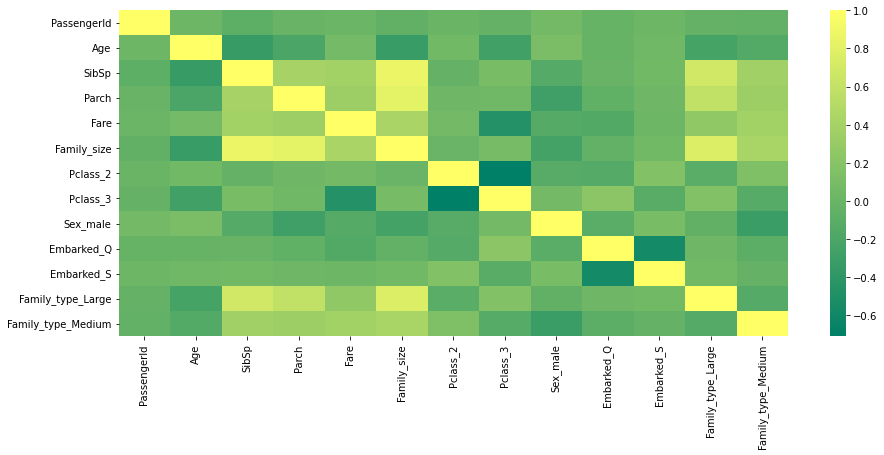

In [59]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='summer')

DRAWING CONCLUSIONS:1.chance of female survival is higher than male survival
                    2.Travelling in Pclass 3 is deadliest
                    3.Somehow,people going to C survived more
                    4.people in the age range of 20-40 had a higher chance of not surviving
                    5.people travelling in smaller families had a higher chance of survival in comparision to people travelling alone